<a href="https://colab.research.google.com/github/kunalNbadgujar/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

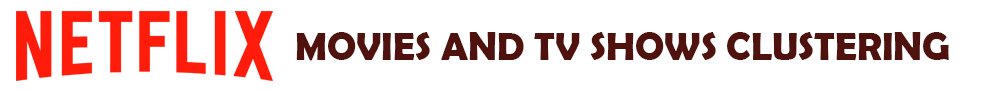

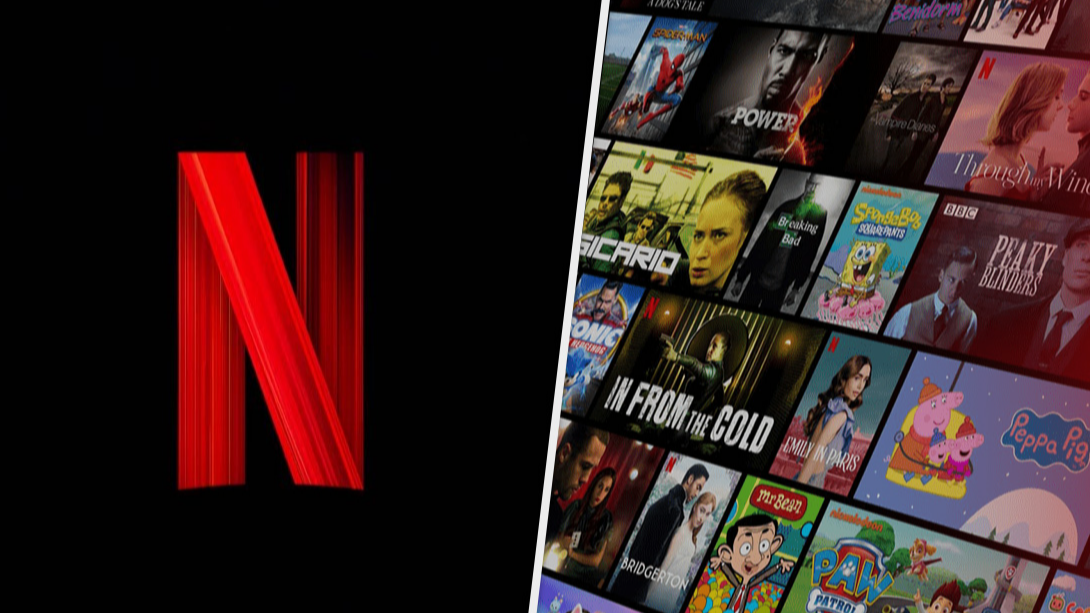

##### **Project Type**    - Unsupervised Machine Learning Algorithm
##### **Contribution**    - Team
##### **Team Member 1 -**  Kunal Badgujar
##### **Team Member 2 -** Aarti Gade
##### **Team Member 3 -** Vivek Tanagawade


# **Project Summary -**

*  The project goal is to Analyze the Netflix catalog of movies and TV shows, and group them into relevant clusters. 
*  This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider,
*  The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

*  There were approximately 7787 records and 11 attributes in the dataset.

*  I started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

*  Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

*  The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

*  Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

*  The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# **GitHub Link -**

https://github.com/kunalNbadgujar/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This Dataset consists of Tv shows and Movies available on netflix as of 2019.
the dataset is collected from Flixable. In 2018, they released an intereting report which shows that the number of TV shows on netflix has nearly tripled since 2010. number of movies has decreased by more than 2000 titles since 2010, while its number of tv shows has nearly tripled. it will be intersting to explore what all other insights can be obtained from the same dataset.

Integrating this Dataset with other external dataset such as IMDB rating, rotten tomatos can also provide many intersting findings.

In this project, required to do





*   EDA


*   Understaing what Kind of content is available in differnt contries.
*   If netflix has been increasingly focusing on TV rather than movies in recent years.

*    Clustering similar content by matching text-based features












---



---



.

.

.

# ***Let's Begin !***



---



**Mounting Drive** 

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


.

**Libraries**

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


# Word Cloud 

from wordcloud import WordCloud, STOPWORDS


#  Textual data

import string,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


# Recommandation system

from sklearn.metrics.pairwise import cosine_similarity


#  Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc



import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


.

.

### **Dataset Loading**

In [80]:
# import csv file from Drive

df=  pd.read_csv('/content/drive/MyDrive/Project Netflix movies and tv shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

.

.

### **Dataset First View**

In [81]:
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

.

## **Know Your Dataset**

**Let's check shape of our dataset**

In [82]:
df.shape

(7787, 12)

our Dataset has 7787 Rows and 12 Columns 

.

.

 **Dataset Information**

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


we see that our data set cantain some null values in some columns.

And, date added column is in object type.

In [84]:
# change type of " date added" column from object type to datetime format
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')

.

.

 **Checking for the null values, And deal with them** 

In [85]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

we see that columns ( direcor , cast , country , date_addded ) cantains some null values, So we have to deal with them,

**Handling Null Values**

In [86]:
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [87]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now, our Dataset has No null values

.

.

**lets check for the duplicate values** 

In [88]:
df.duplicated().sum()

0

our dataset have no duplicate values

.

.

.

## **Understanding Your Variables**

**Statistical Description** 

In [89]:
df.describe()

release_year
count   7777.000000
mean    2013.935965
std        8.760694
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [90]:
df.describe(include='object')

show_id   type title director     cast        country rating  duration  \
count     7777   7777  7777     7777     7777           7777   7777      7777   
unique    7777      2  7777     4050     6822            682     14       216   
top         s1  Movie    3%  Unknown  Unknown  United States  TV-MA  1 Season   
freq         1   5377     1     2379      718           2549   2868      1608   

            listed_in                                        description  
count            7777                                               7777  
unique            491                                               7759  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3

.

.

.

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

.

**Chart - 1 Movies and TV shows**

Text(0.5, 1.0, 'Count of Values')

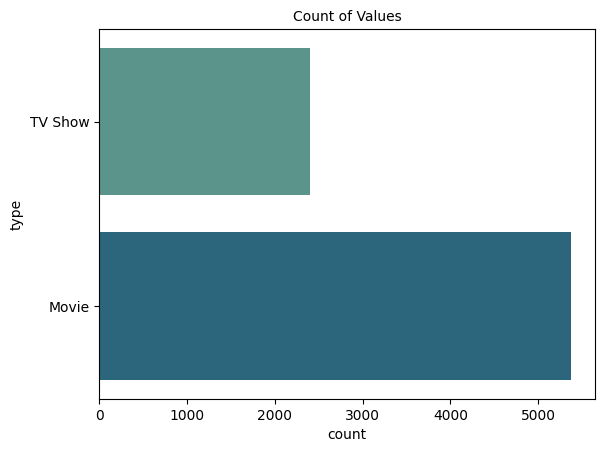

In [91]:
graph = sns.countplot(y = 'type', data = df,palette='crest')
graph.set_title('Count of Values', size=10)

There are **5372 Movies**   and   **2398 TV shows** in the dataset.

.

.

**Chart - 2 country**

Text(0.5, 1.0, 'Count of Values')

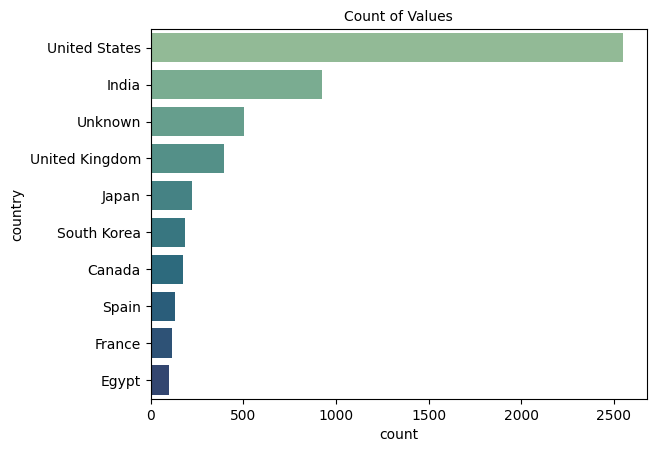

In [195]:
country= sns.countplot(y = 'country',order=df['country'].value_counts().index[:10], data = df,palette='crest')
country.set_title('Count of Values', size=10)

The highest number of movies / TV shows were based out of the US, followed by India and UK.

.

.

**Chart - 3 Rating**

Text(0.5, 1.0, 'Count of Values')

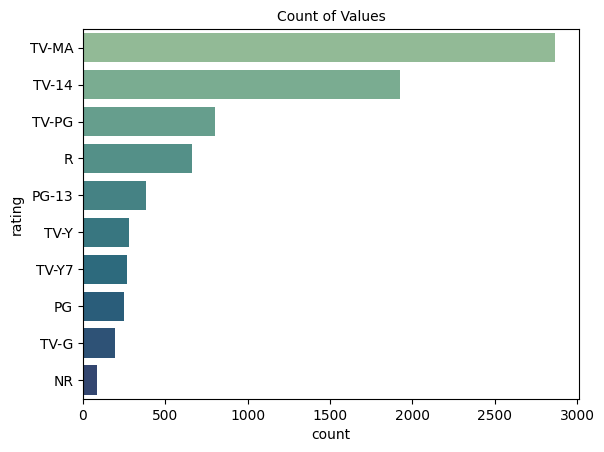

In [200]:
Rating= sns.countplot(y = 'rating',order=df['rating'].value_counts().index[:10], data = df,palette='crest')
Rating.set_title('Count of Values', size=10)

most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).

.

.

**Chart - 4 Shows as per year**

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800')])

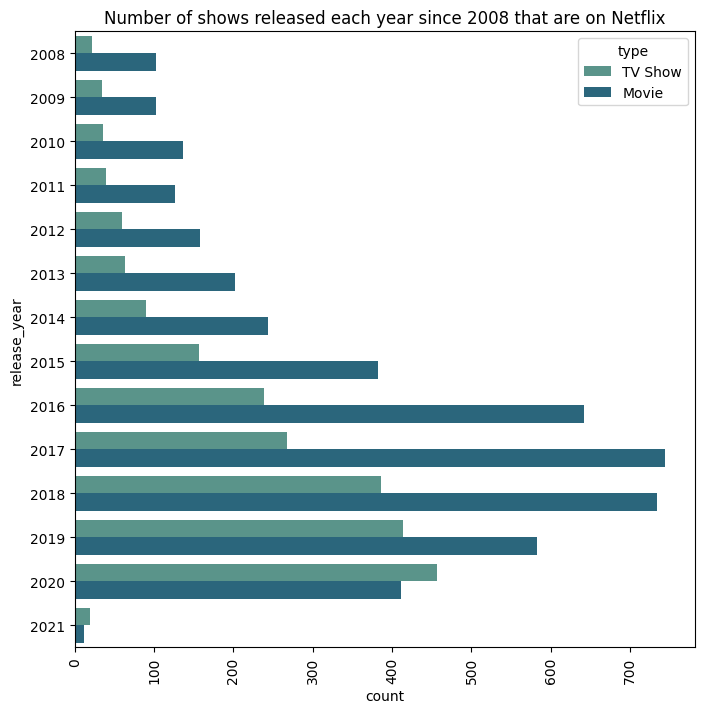

In [199]:
plt.figure(figsize=(8,8))
count = sns.countplot(y="release_year", hue='type', data=df, order=range(2008,2022),palette='crest')
count.set_title('Number of shows released each year since 2008 that are on Netflix')
plt.xticks(rotation=90)

1. Netflix has greater number of new movies / TV shows than the old ones.

2. Over the years, Netflix has consistently focused on adding more shows in its platform.

3. As per the plot movies rate is high as compared to tv shows

.

.

**Chart - 5 Director**

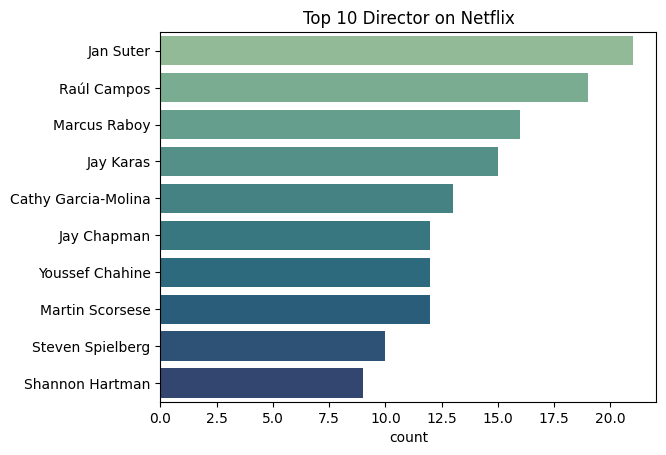

In [203]:
directors = df[df.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='crest')
plt.title('Top 10 Director on Netflix')
plt.show()

jan suter is top director of the netflix has directs near about 20 shows and movies

.

.

**Chart - 6 Top 10 genres for TV Show**

Text(0.5, 1.0, 'Top 10 genres for TV Show')

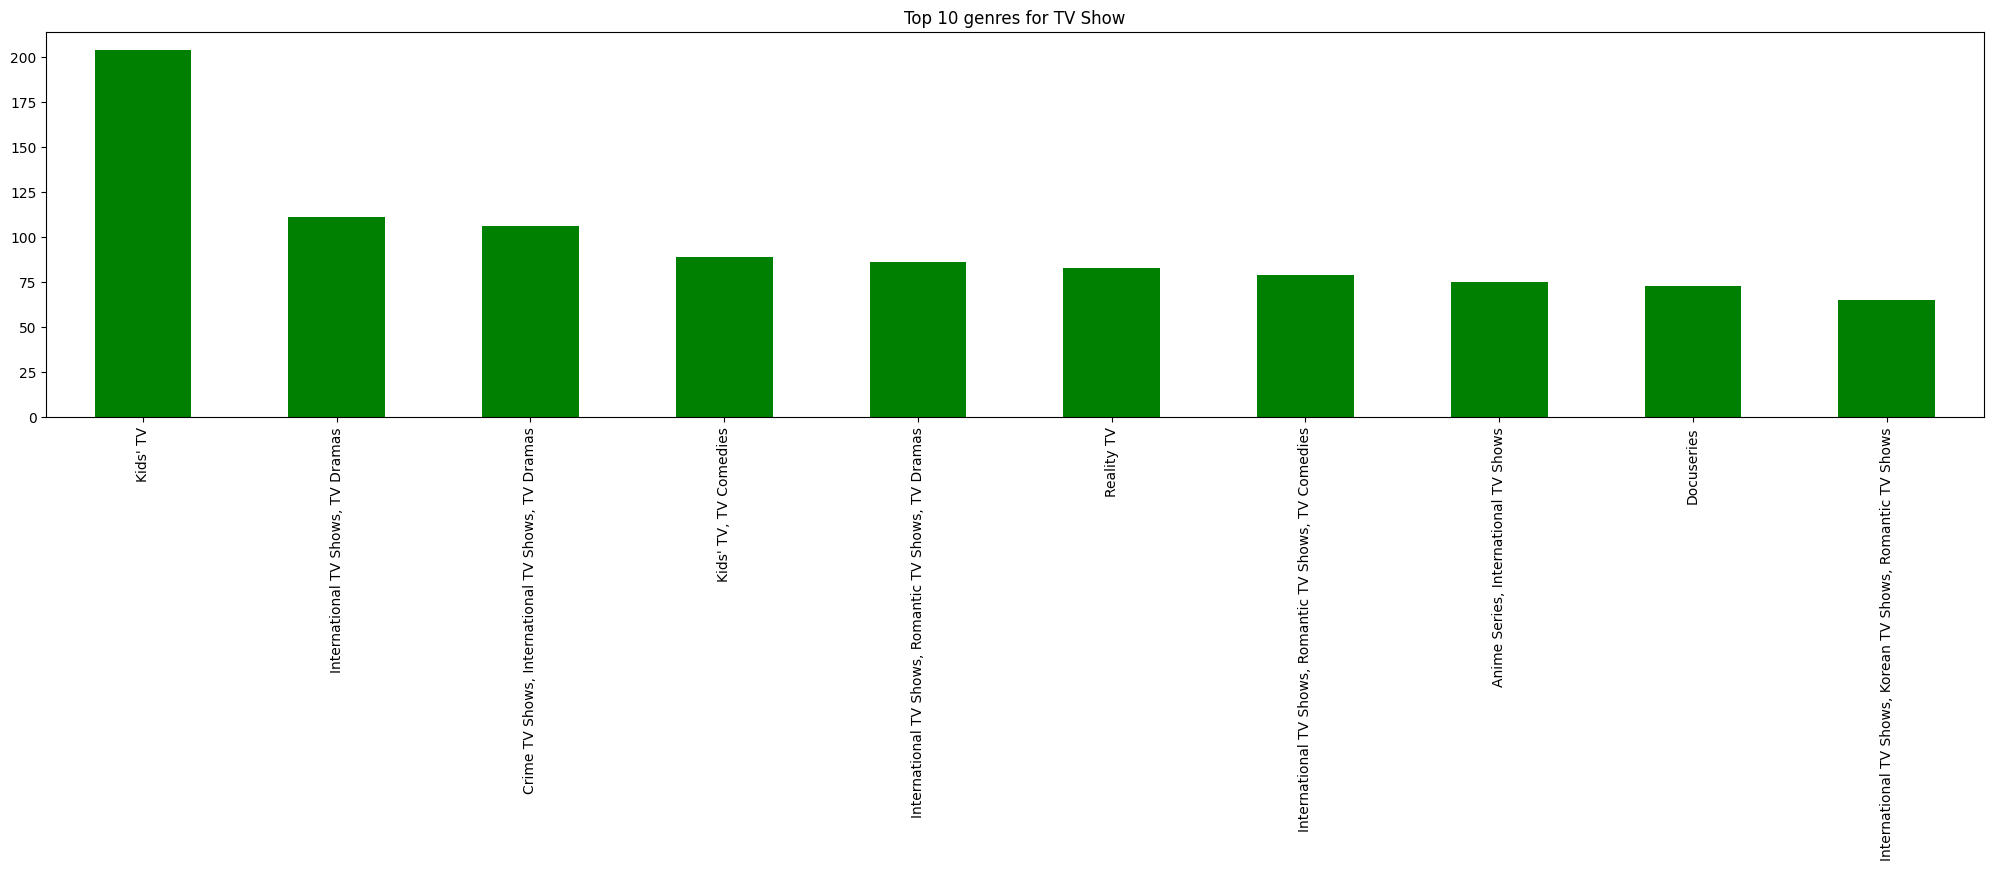

In [96]:
# Top 10 genre for movies
plt.figure(figsize=(25,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar',color='g')
plt.title('Top 10 genres for TV Show')

In this graph we found Top 10 genres for tv shows and kids tv shows highest among all

.

.

**Chart 7 Actor**

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

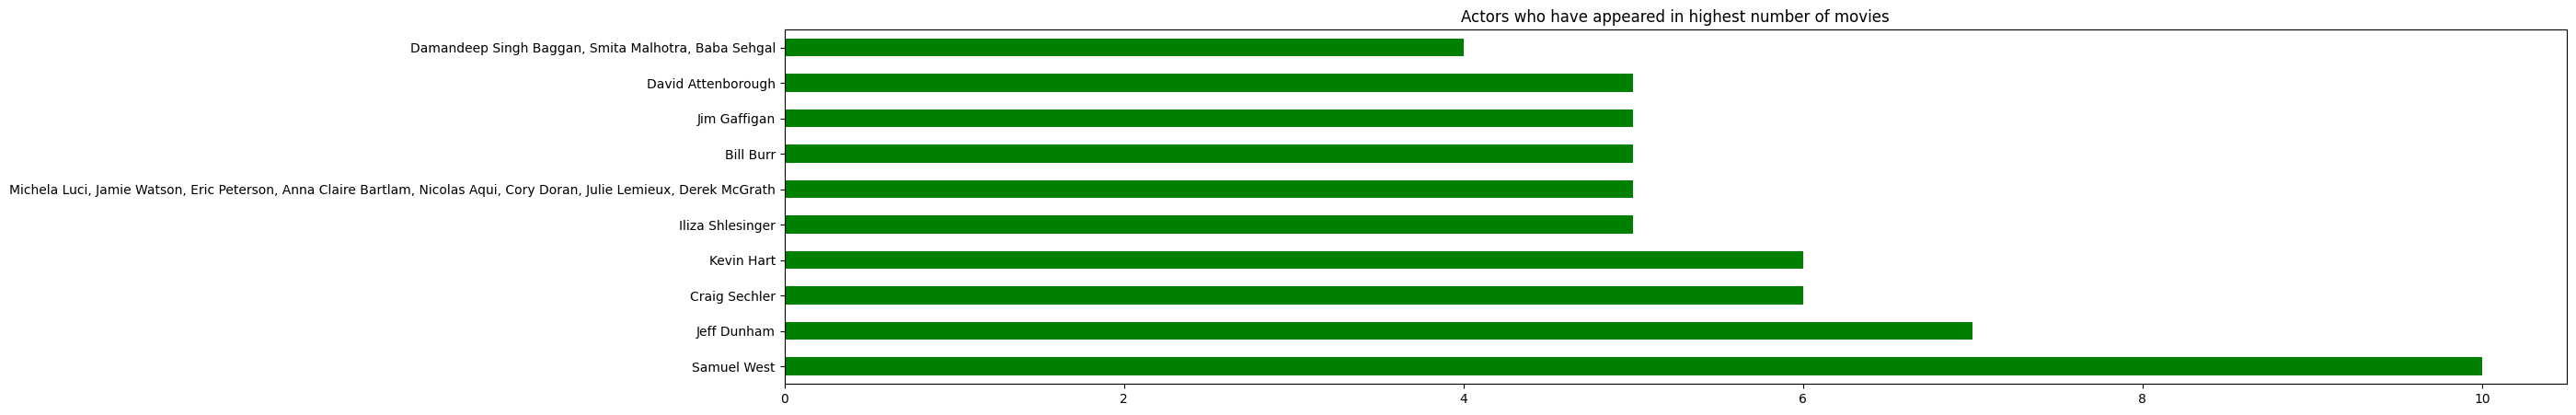

In [97]:
# Top actors for movies
plt.figure(figsize=(25,5))
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='crest')
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh' ,color = 'g')
plt.title('Actors who have appeared in highest number of movies')

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

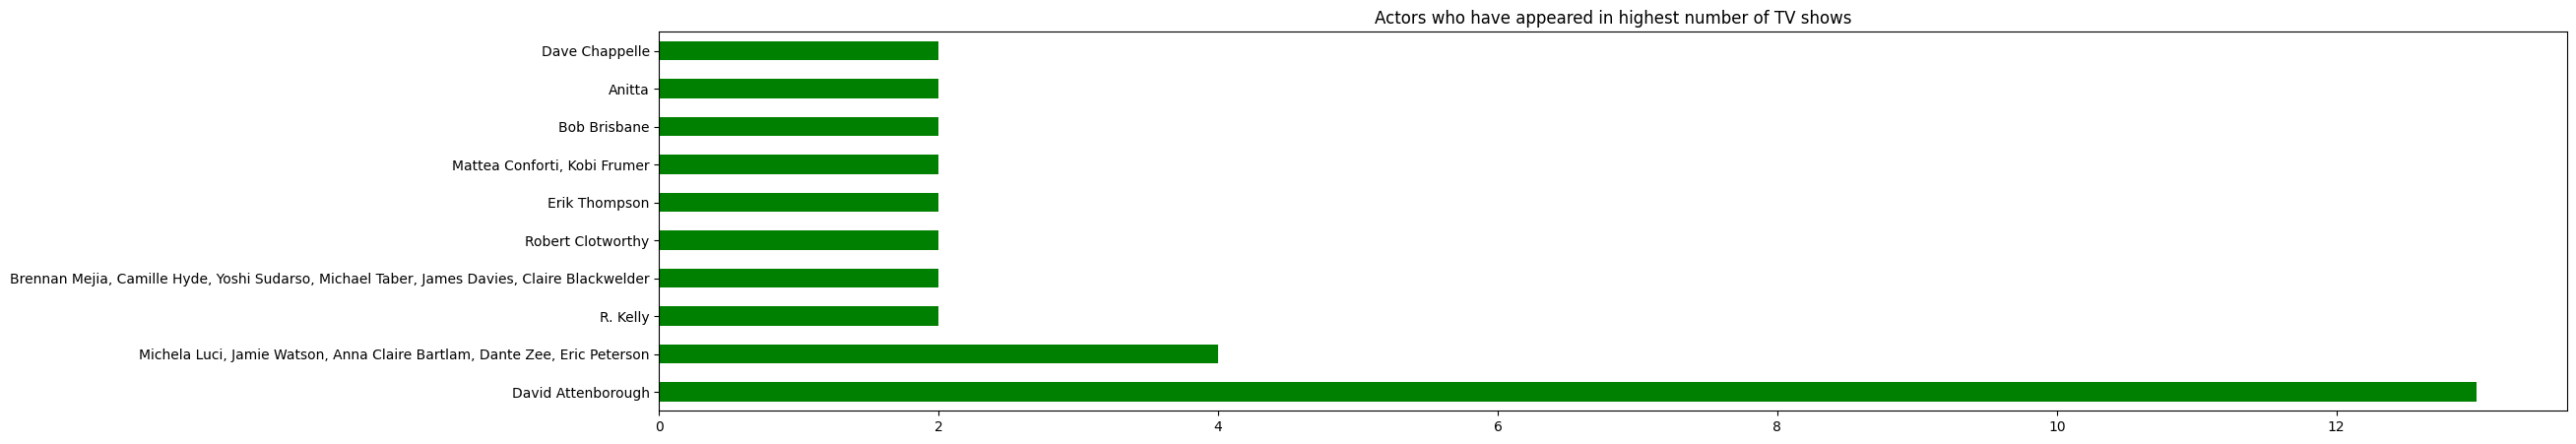

In [98]:
# Top actors for TV Shows
plt.figure(figsize=(25,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh',color ='g')
plt.title('Actors who have appeared in highest number of TV shows')

1. David attenborough played highest role in the TV shows.
2. Samuel west played highest number of role in the movies.

.

.

**Chart - 9 Description**

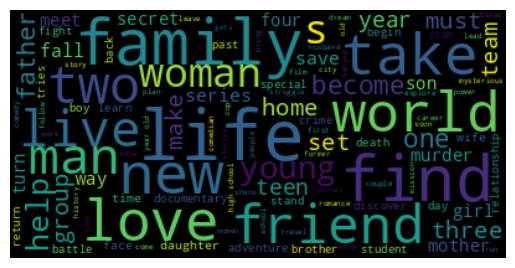

In [99]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()
     

Most of the comman words present in description column are family, find, life, love, new, world, friend.

.

.

.

## **Feature Engineering & Data Pre-processing**

**Textual Data Preprocessing**

In [100]:
# creating clustering_attributes column using all text column which one is used for model building purpose.

df['clustering_attributes'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country'] + df['director'] 
df.clustering_attributes[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilUnknown'

We have successfully added all the necessary data into a single column

.

**Removing non-ASCII characters:**

In [101]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [102]:
# remove non-ascii characters

df['clustering_attributes'] = remove_non_ascii(df['clustering_attributes'])
df['clustering_attributes'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoao Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zeze Motta, Celso FrateschiBrazilUnknown'

.

**Removing Punctuation**

In [103]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)     

In [104]:
# Removing punctuation marks

df['clustering_attributes'] = df['clustering_attributes'].apply(remove_punctuation)
df['clustering_attributes'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalorInternational TV Shows TV Dramas TV SciFi  FantasyTVMAJoao Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zeze Motta Celso FrateschiBrazilUnknown'

.

**Removing stopwords**

In [105]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
# extracting the stopwords from nltk library

sw = stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [107]:
# function to remove stop words

def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [108]:
# Removing stop words

df['clustering_attributes'] = df['clustering_attributes'].apply(stopwords)
df['clustering_attributes'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi fantasytvmajoao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschibrazilunknown'

.

**Stemming**

In [109]:
# create an object of stemming function

stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

df['clustering_attributes'] = df['clustering_attributes'].apply(stemming)
df['clustering_attributes'][0]


'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoao miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zeze motta celso frateschibrazilunknown'

.

**Text Vectorization**

In [110]:
# extract the tfid representation matrix of the text data
tfid_vectorizer= TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000) 
# max features = 10000 to prevent system from crashing


# fit the vectorizer using the text data
tfid_matrix = tfid_vectorizer.fit_transform(df['clustering_attributes'])

# collect the tfid matrix in numpy array
array = tfid_matrix.toarray() 


print(array)
print(f'shape of the vector : {array.shape}')
print(f'datatype : {type(array)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7777, 10000)
datatype : <class 'numpy.ndarray'>


.

**Dimesionality Reduction**

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [111]:
# using PCA to reduce dimensionality

pca = PCA(random_state=0)
pca.fit(array)

PCA(random_state=0)

Text(0, 0.5, 'cumulative explained variance')

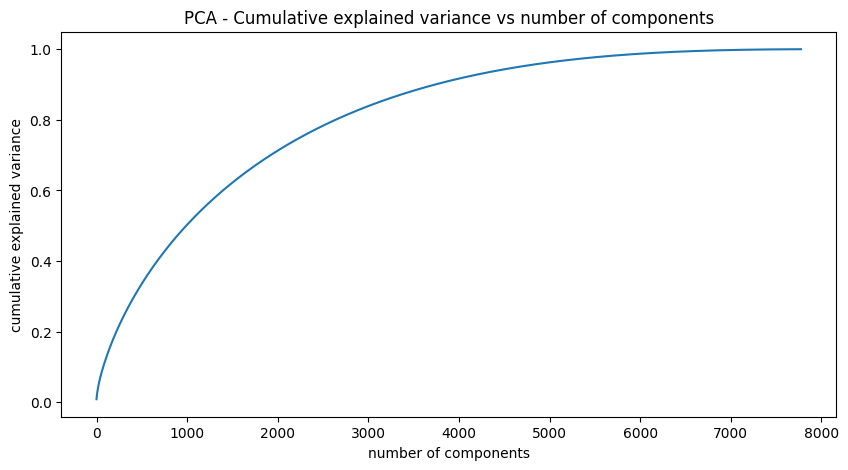

In [112]:
# Explained variance for different number of components

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We find that 100% of the variance is explained by about ~7600 components. Also, more than 80% of the variance is explained just by 4000 components.

In [113]:
# reducing the dimensions to 4000 using pca

pca = PCA(n_components=4000,random_state=0)
pca.fit(array)

PCA(n_components=4000, random_state=0)

In [114]:
# transformed features
X = pca.transform(array)

In [115]:
# shape of transformed vectors
X.shape

(7777, 4000)

.

.

.

## **K-Means Clustering**

Text(0, 0.5, 'WCSS')

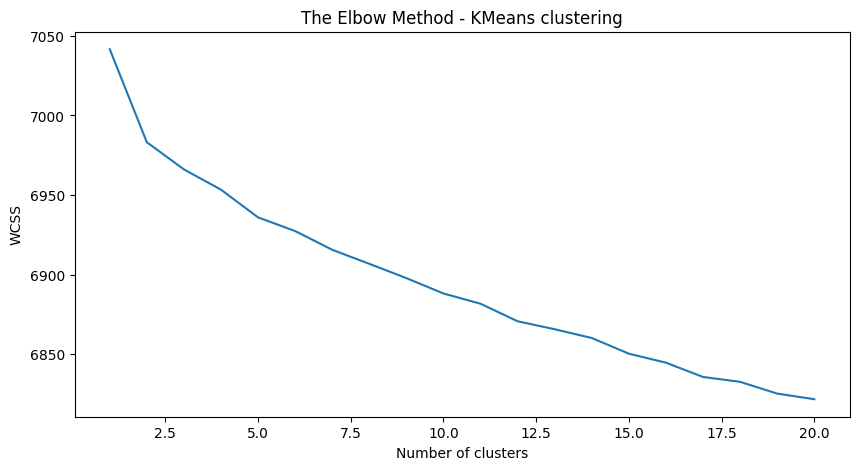

In [116]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,21):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,21)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


WCSS (Within-Cluster Sum of Squared) distance between each point and centriod in cluster decresed with increse the no. of cluster







**Building clusters using the k-means algorithm:**

For n_clusters = 2 The average silhouette_score is : 0.005066198722992101
For n_clusters = 3 The average silhouette_score is : 0.005750686379367376
For n_clusters = 4 The average silhouette_score is : 0.005595552070530266
For n_clusters = 5 The average silhouette_score is : 0.005827736612607973
For n_clusters = 6 The average silhouette_score is : 0.005614378998251814
For n_clusters = 7 The average silhouette_score is : 0.005471229101869202
For n_clusters = 8 The average silhouette_score is : 0.0056699160529560975
For n_clusters = 9 The average silhouette_score is : 0.003330174255210791
For n_clusters = 10 The average silhouette_score is : 0.003682892163009218
For n_clusters = 11 The average silhouette_score is : 0.0040093897472375005
For n_clusters = 12 The average silhouette_score is : 0.003990478620630435
For n_clusters = 13 The average silhouette_score is : 0.003927236214784288
For n_clusters = 14 The average silhouette_score is : 0.004139255343043234


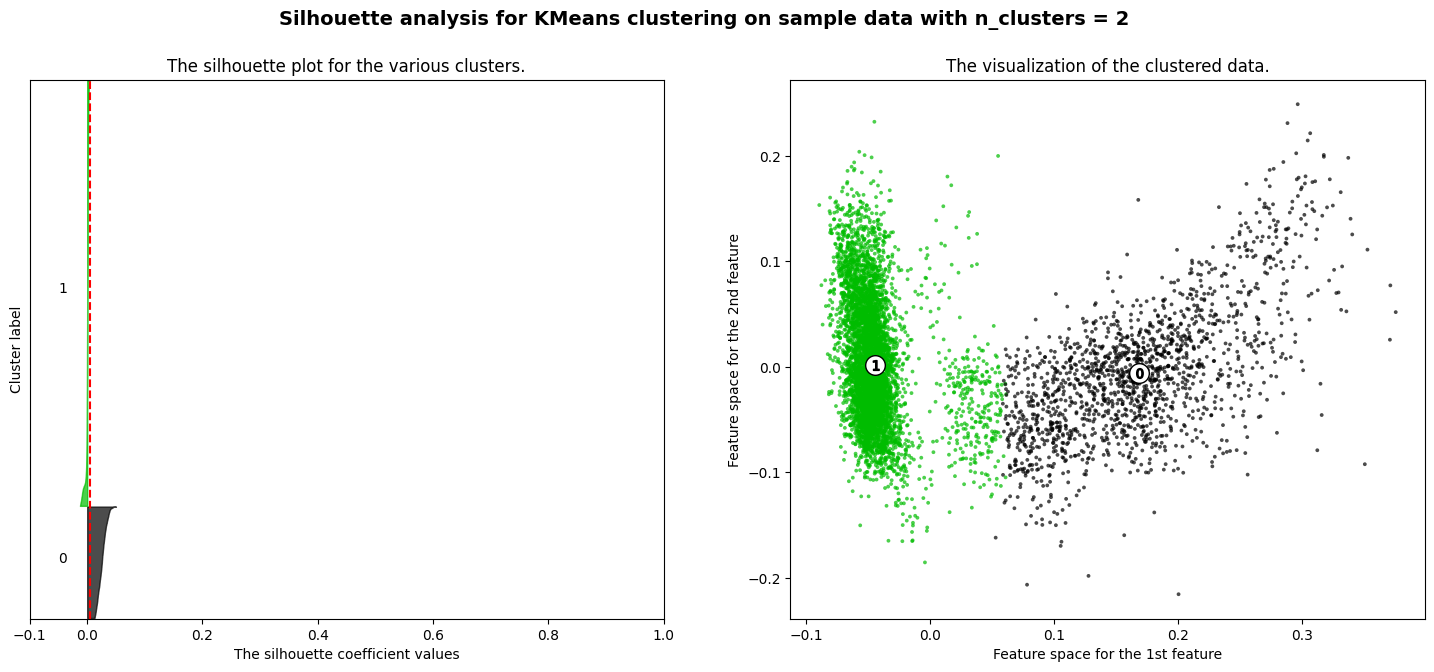

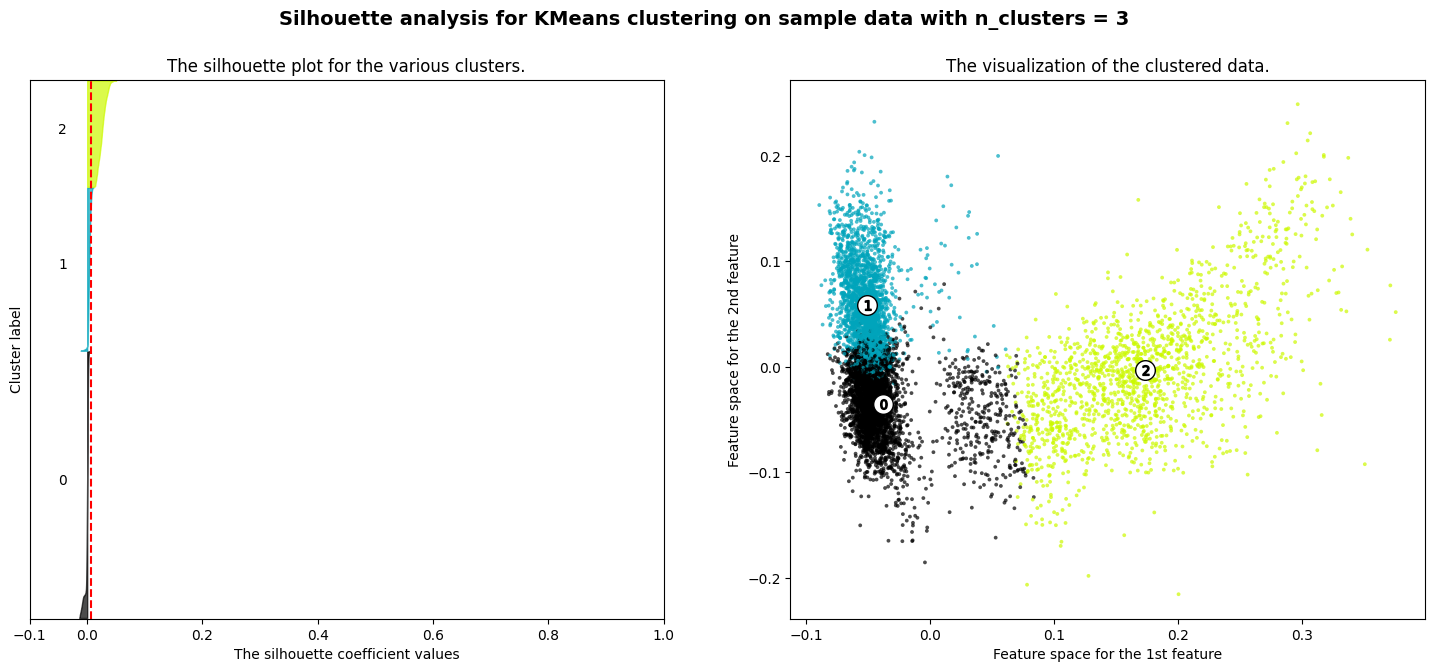

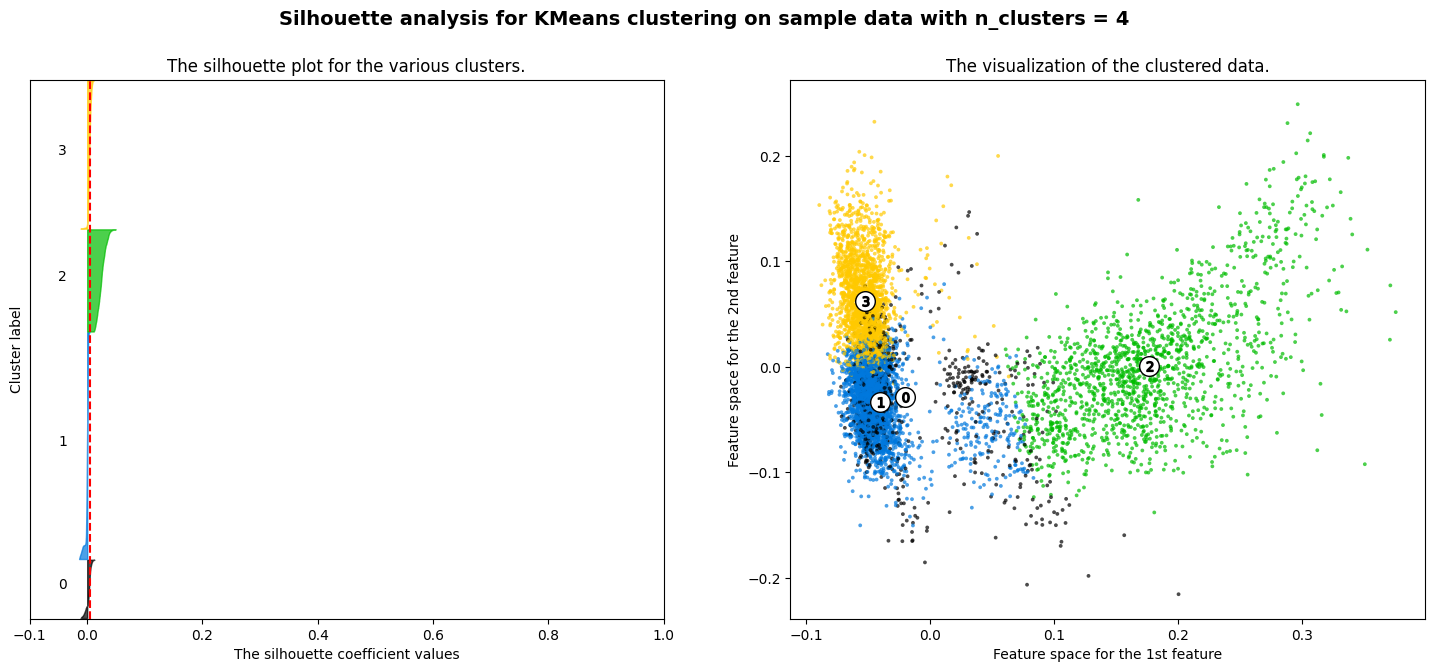

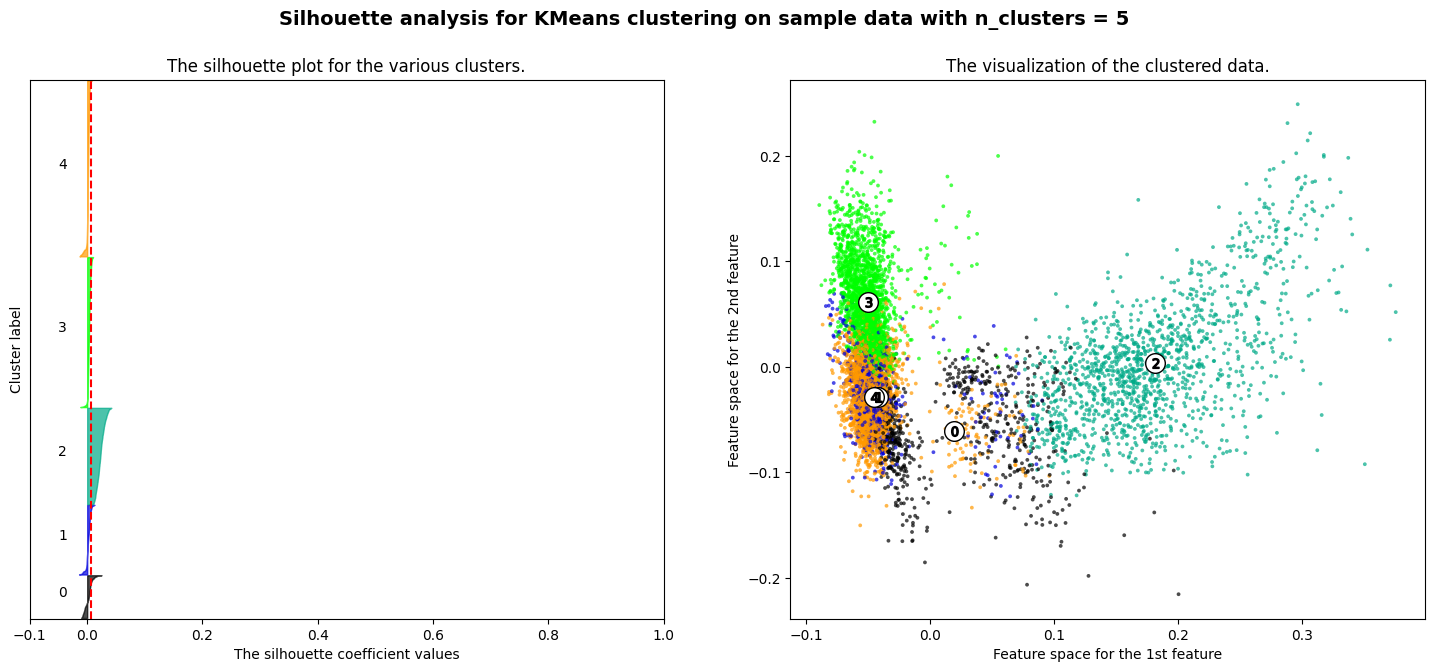

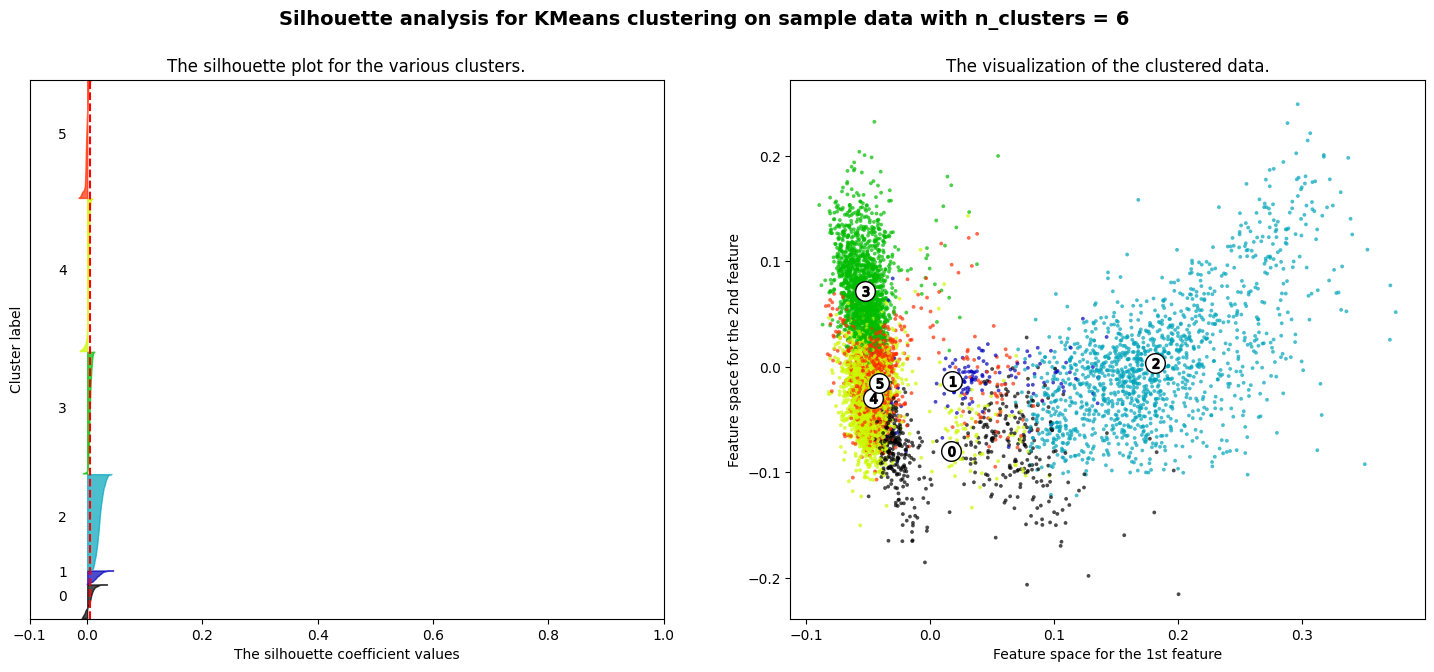

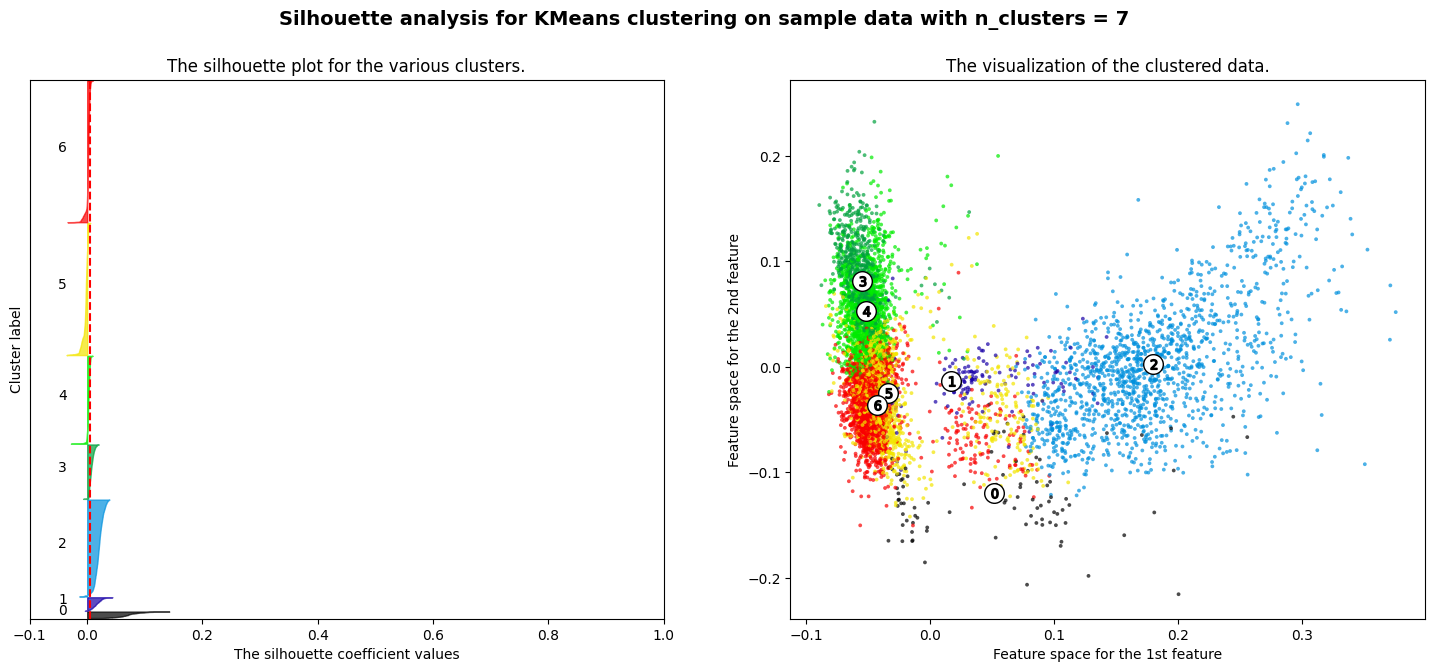

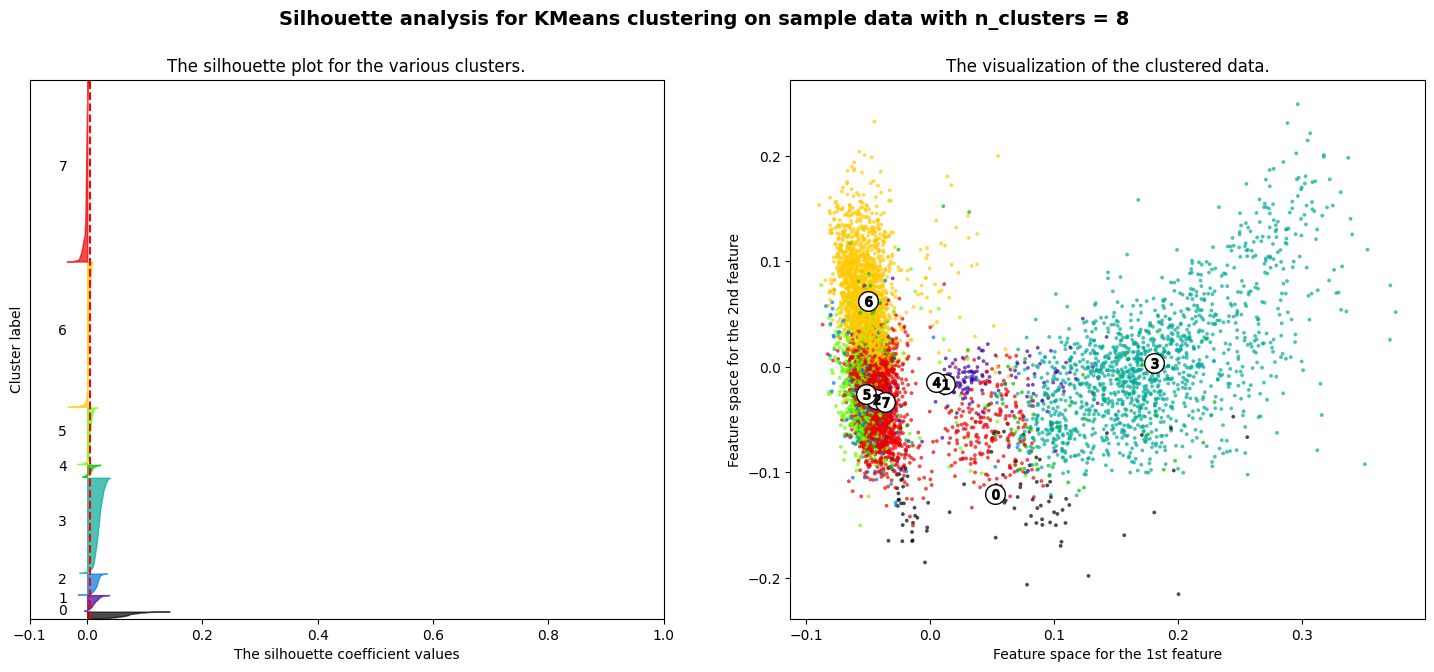

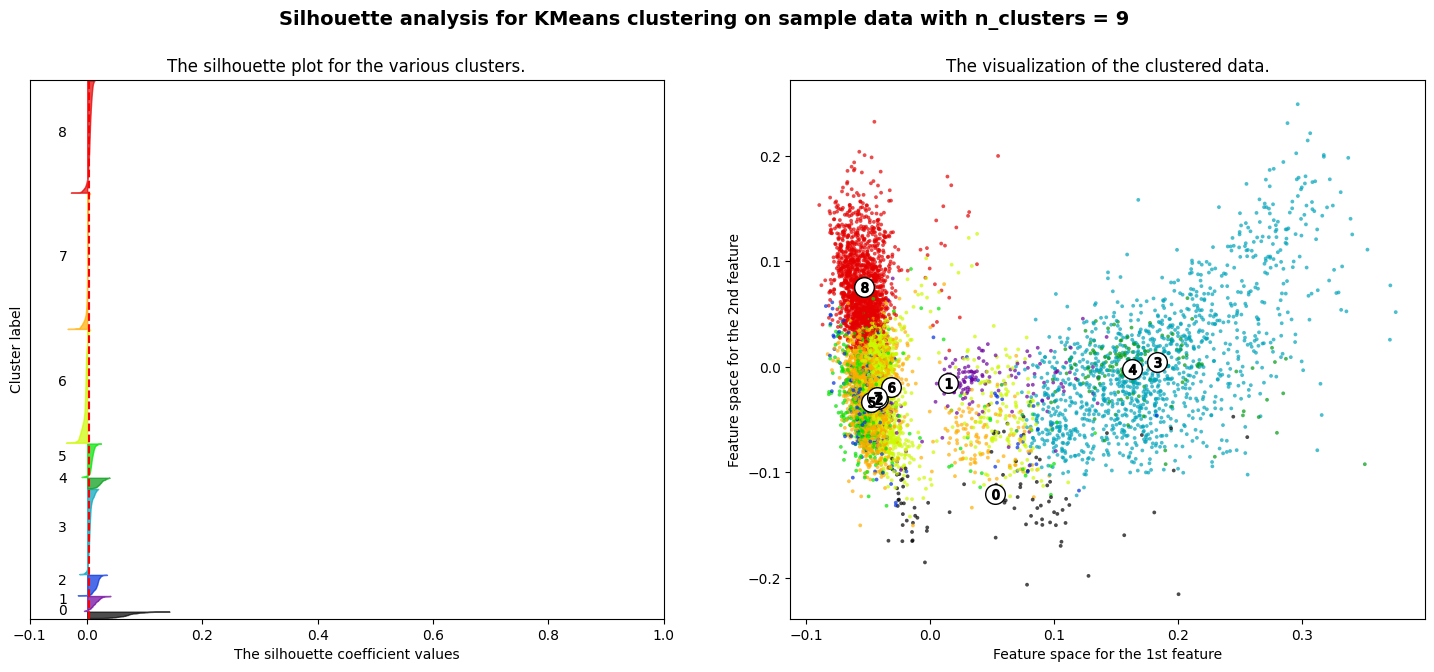

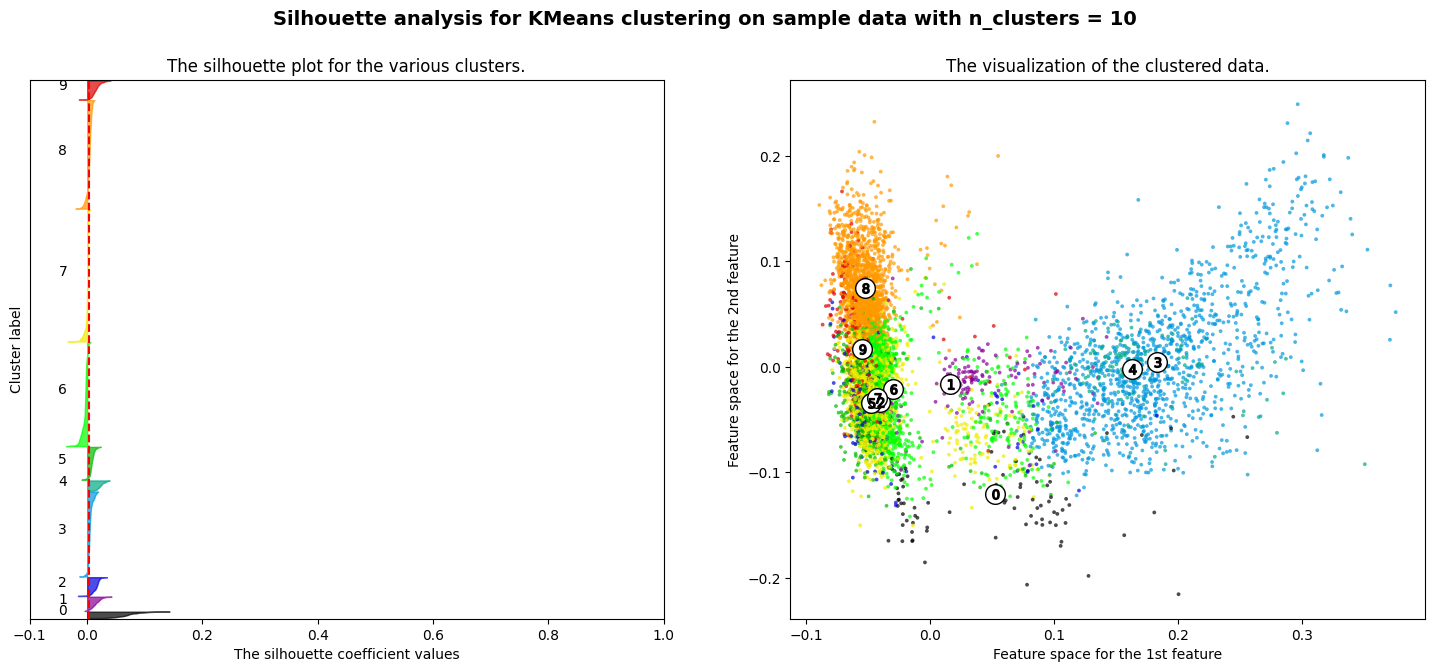

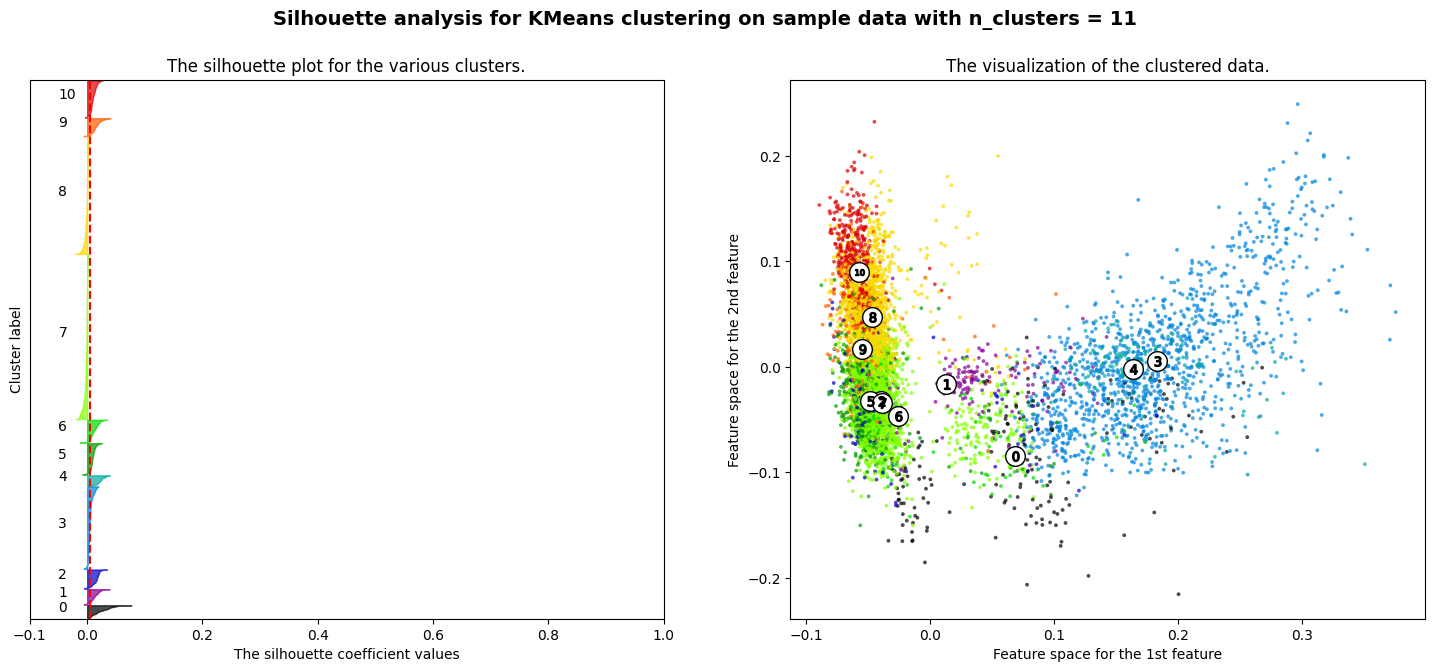

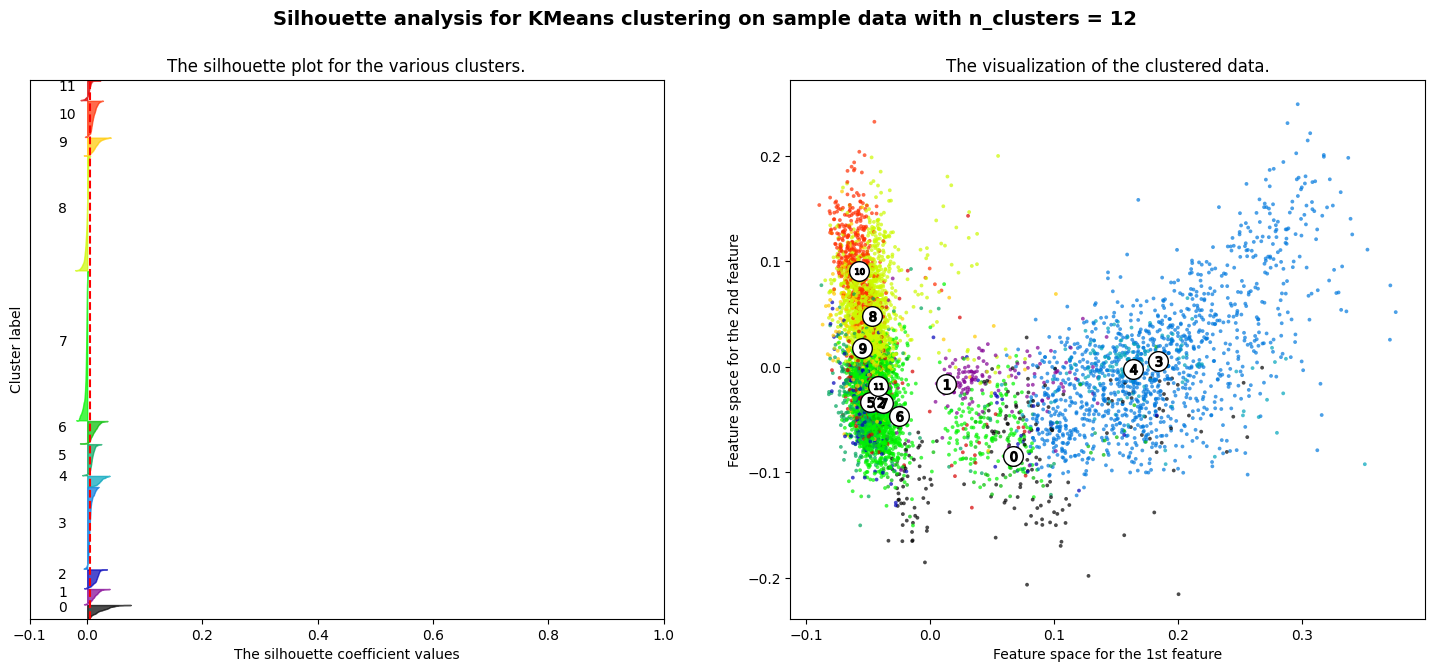

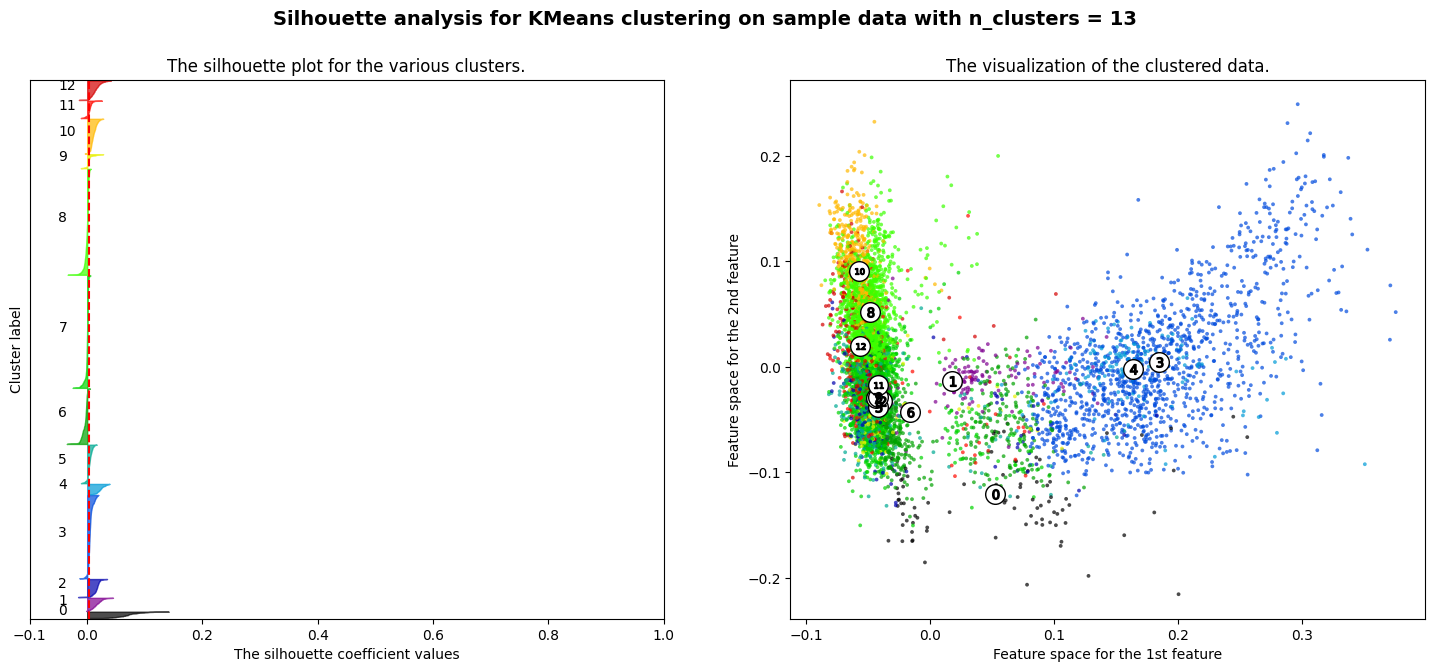

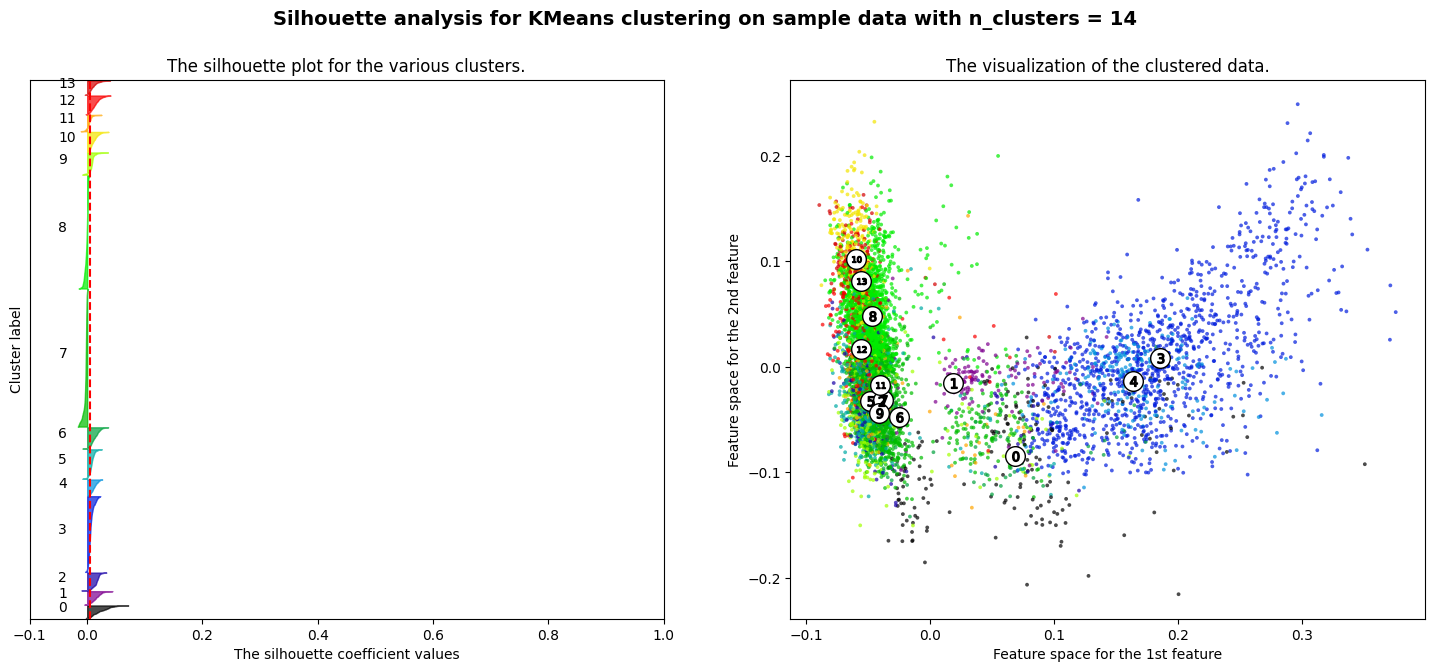

In [146]:
for n_clusters in range(2, 15):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [181]:
# Clustering the data into 6 clusters

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(X)
     

KMeans(n_clusters=3, random_state=0)

In [182]:
# Evaluation metrics - distortion, Silhouette score

kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

In [183]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_
     

Text(0.5, 1.0, 'Number of movies and TV shows in each cluster - Kmeans Clustering')

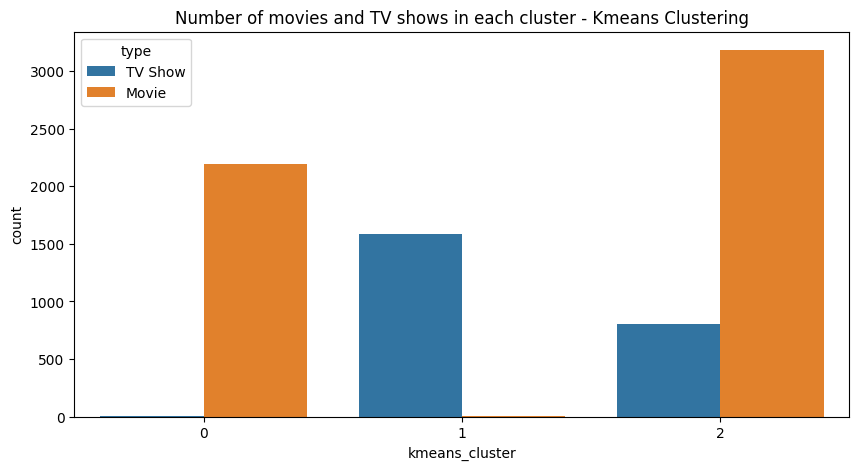

In [184]:
# Number of movies and tv shows in each cluster

plt.figure(figsize=(10,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

Successfully built 3 clusters using the k-means clustering algorithm.

## **Hierarchical clustering:**

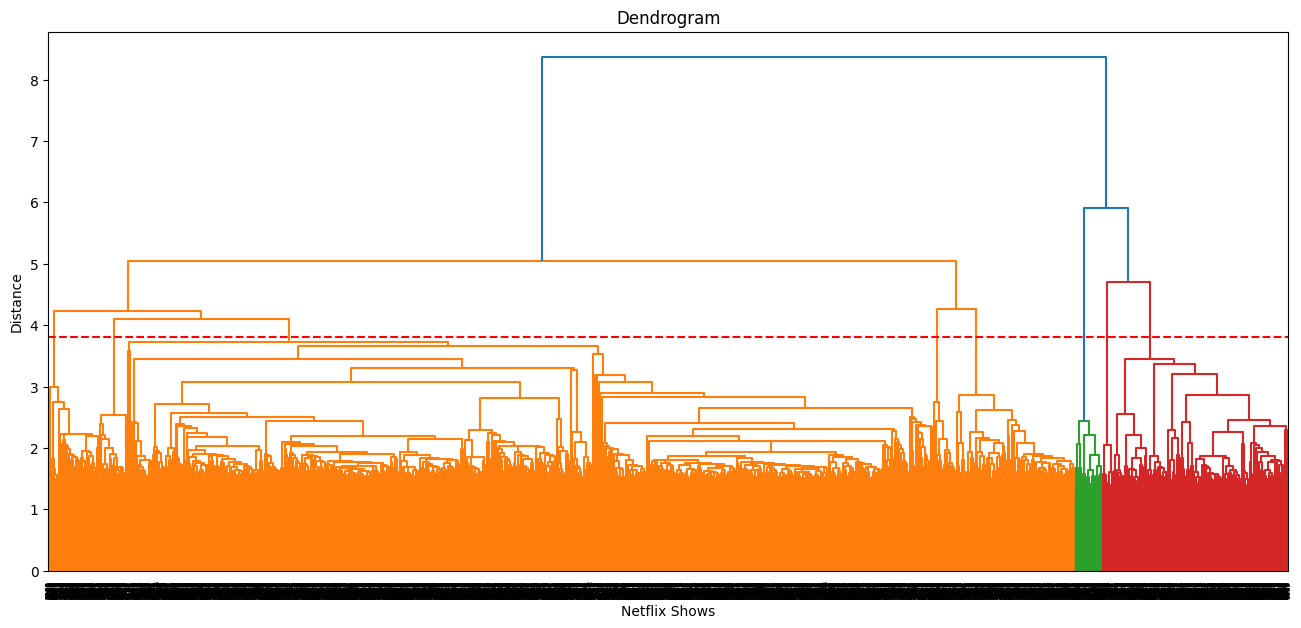

In [149]:
# Building a dendogram to decide on the number of clusters

plt.figure(figsize=(16, 7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

3 clusters can be built using the agglomerative clustering algorithm

In [154]:
# Fitting hierarchical clustering model

hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)     

array([1, 0, 0, ..., 0, 1, 0])

In [155]:
# Adding a hierarchical cluster number attribute

df['hierarchical_cluster'] = hierarchical.labels_
     

Text(0.5, 1.0, 'Number of movies and tv shows in each cluster - Hierarchical Clustering')

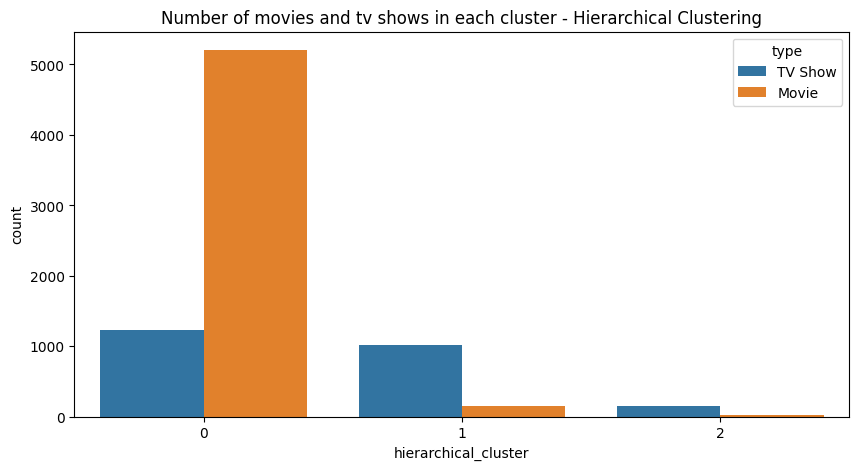

In [156]:
# Number of movies and tv shows in each cluster

plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

## **using content based recommender system**

This method uses only information about description of the items users have previously consumed model users's interfernce or we also said that algorithm try to recomended items that are similar to those that a user liked in the past

In [126]:
# veryfying index
df[['show_id', 'title', 'clustering_attributes']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7782   s7783                                     Zozo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                  clustering_attributes  
0     futur elit inhabit island paradis far crowd sl...  
1     devast earthquak hit mexico citi trap survivor...  
2     armi recruit found dead fellow soldier forc co...  
3     postapocalypt world ragdol robot hide fear dan...  
4     brilliant group student becom cardcount expert...  
...                                                 ...  
7782  lebanon civil war depriv zozo famili hes left ...  
7783  scrappi poor boy worm way tycoon dysfunct fami...  
7784  documentari south african rapper nasti c hit s...  
7785  dessert wizard adriano zumbo look next willi w...  
7786  documentari delv mystiqu behind bluesrock trio...  

[7777 rows x 3 columns]

In [127]:
# calling out transformed array independent features created from text_data(cluster) column after performing PCA for dimenssionality reduction.
X
     

array([[ 1.64453707e-01, -1.28163668e-02, -5.98562412e-03, ...,
         9.80497012e-03, -5.86337260e-03,  3.84336418e-03],
       [-4.37444307e-02,  7.90042917e-03, -1.29677041e-02, ...,
         6.32436741e-03, -6.23224063e-03, -1.81731368e-02],
       [-4.24445111e-02,  3.12641399e-02,  4.73097974e-02, ...,
         6.49438814e-03,  1.81977143e-03,  9.22551833e-03],
       ...,
       [-7.32997853e-02,  3.33515337e-02, -6.00571273e-02, ...,
        -1.27866149e-02,  1.39128485e-04,  3.64674241e-03],
       [ 6.95849776e-02, -3.79721285e-02, -3.70314132e-02, ...,
         1.01625292e-02, -6.93619142e-04, -1.80136945e-03],
       [-6.86079348e-02, -6.58683345e-02, -5.01952776e-02, ...,
        -7.95064350e-03, -1.39561535e-03, -7.90799391e-04]])

In [128]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

In [129]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.08120532,  0.01814198, ..., -0.01805828,
         0.00802907, -0.01466423],
       [ 0.08120532,  1.        , -0.00338098, ...,  0.0700337 ,
        -0.00517538, -0.00619733],
       [ 0.01814198, -0.00338098,  1.        , ...,  0.00237275,
        -0.00862067, -0.01203975],
       ...,
       [-0.01805828,  0.0700337 ,  0.00237275, ...,  1.        ,
        -0.00870041,  0.05241545],
       [ 0.00802907, -0.00517538, -0.00862067, ..., -0.00870041,
         1.        ,  0.04503202],
       [-0.01466423, -0.00619733, -0.01203975, ...,  0.05241545,
         0.04503202,  1.        ]])

In [130]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = df[df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)
     

In [192]:
recommend('14 Minutes from Earth')

If you liked '14 Minutes from Earth', you may also enjoy: 

The Mars Generation
A Year In Space
Miles Davis: Birth of the Cool
Miniforce X
Goldie
The Memphis Belle: A Story of a
Flying Fortress
Alien TV
The Space Between Us
How to Stage a Coup
Life in the Doghouse


In [191]:
recommend('2 States')

If you liked '2 States', you may also enjoy: 

Ugly
Udaan
Power Paandi
Sudani from Nigeria
A Flying Jatt
Udta Punjab
Yeh Meri Family
Action Replayy
Kapoor & Sons
Kaabil


.

.

.

# **Conclusion**

There were approximately 7787 records and 11 attributes in the dataset.


*   I started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

*   Then I did some texual data preprocessing in that i did removing stop word ,removing punctuation,stemming.

*   The attributes were chosen as the basis for the clustering of the data: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

*   10000 attributes in total were created by TFIDF vectorization

*   i used (PCA) to reduce dimensionality.4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.

*   after that we bluid K- means clustering in that i used two method elbow method and silhouette mathod

*   Then clusters were built using the Agglomerative clustering algorithm

*   A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make top 10 recommendations to the user based on the type of show they watched

